<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/Classify_Images_using_Dimentionality_reduction_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group images into separate classes using Dimensionality Reduction technique.

The objective is to separate the 1797 images into ten classes,
depending on the digits that is representing **[0,1,2,3,4,5,6,7,8,9]**
Exercise:
- Do this with a Dimensionality Reduction technique.

## Data Processing

In [67]:
import pandas as pd

#get the digits dataset. (data, target) -> data is 1D flattened array for 8*8 image and target label represents what digit it is.
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
#Load the digits data.
digits = load_digits()

#Capture the data and target
data = digits.data
target = digits.target

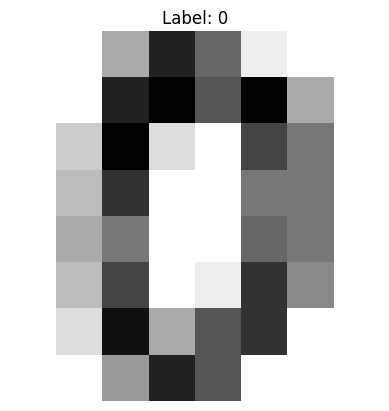

In [20]:
first_image = data[0].reshape(8, 8) # reshape the first image into 8*8 matrix

plt.imshow(first_image, cmap='binary', interpolation='nearest') # Display the image with matplotlib
plt.title(f"Label: {target[0]}")
plt.axis("off")
plt.show()

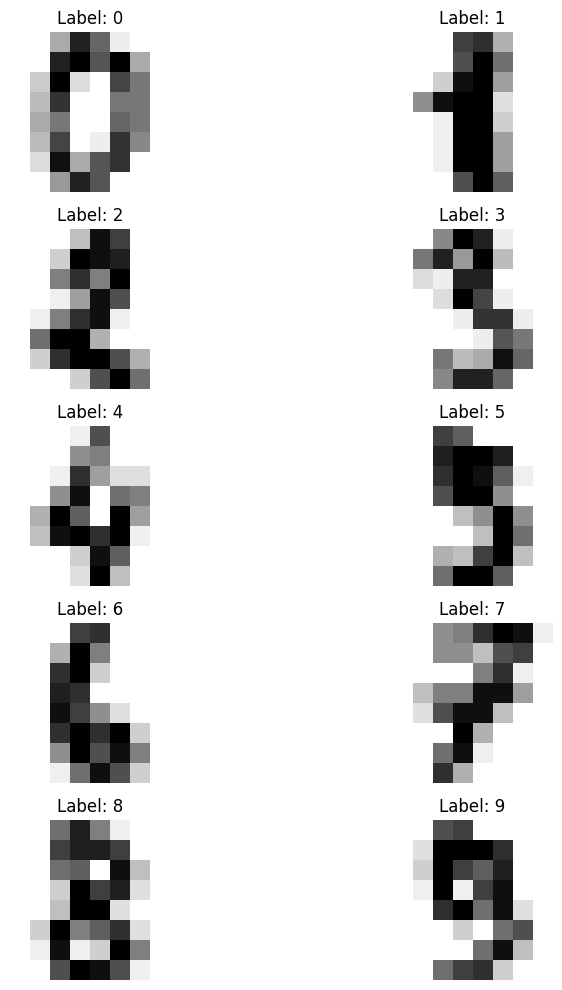

In [25]:
# showing 10 images in 5 * 2 grid
n_rows = 5
n_cols = 2
total_images = n_rows * n_cols

plt.figure(figsize=(10, 10))
for i in range(total_images) :
  image = data[i].reshape(8, 8)
  plt.subplot(n_rows, n_cols, i + 1)
  plt.imshow(image, cmap='binary', interpolation='nearest')
  plt.title(f"Label: {target[i]}")
  plt.axis("off")

plt.tight_layout()
plt.show()

## Using Principal Component Analysis(PCA)

In [36]:
# for 2D space
myPCA_2d = PCA(n_components=2).fit(data)
transformed = myPCA_2d.transform(data)
digits_pca_2d = pd.DataFrame({'PC1':transformed[:, 0], 'PC2':transformed[:, 1], 'class':target})

digits_pca_2d.head()

,PC1,PC2,class
0,-1.259466,21.274884,0
1,7.957611,-20.768699,1
2,6.991923,-9.955986,2
3,-15.906105,3.332464,3
4,23.306867,4.269060,4


<Axes: xlabel='PC1', ylabel='PC2'>

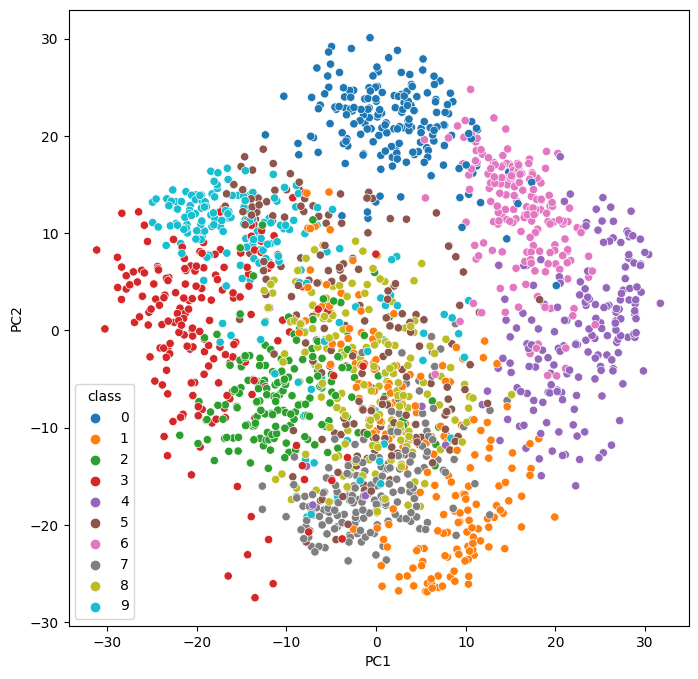

In [40]:
# 2D plot
fig=plt.figure(figsize=(8, 8))

sns.scatterplot(x='PC1', y='PC2', hue='class', data=digits, palette='tab10')

In [41]:
# for 3D space
myPCA_3d = PCA(n_components=3).fit(data)
transformed = myPCA_3d.transform(data)
digits_pca_3d = pd.DataFrame({'PC1':transformed[:, 0], 'PC2':transformed[:, 1], 'PC3':transformed[:, 2], 'class':target})

digits_pca_3d.head()

,PC1,PC2,PC3,class
0,-1.259466,21.274883,-9.463055,0
1,7.957612,-20.768699,4.439505,1
2,6.991923,-9.955986,2.958559,2
3,-15.906105,3.332464,9.824372,3
4,23.306868,4.269061,-5.675129,4


In [53]:
# 3D plot
fig=plt.figure(figsize=(8, 8))
fig = px.scatter_3d(digits_pca_3d, x='PC1', y='PC2', z='PC3', color='class')
fig.show()

<Figure size 800x800 with 0 Axes>

## Using ISOMAP

In [47]:
# for 2D space
isomap_2d = Isomap(n_components=2, n_neighbors=10)

transformed = isomap_2d.fit_transform(data)

digits_isomap_2d = pd.DataFrame({'Isomap1':transformed[:, 0], 'Isomap2':transformed[:, 1], 'class': target})

digits_isomap_2d.head()

,Isomap1,Isomap2,class
0,99.142117,-30.935615,0
1,-26.787590,46.718209,1
2,-33.823779,3.050455,2
3,5.898332,-70.466318,3
4,43.687659,111.634791,4


<Axes: xlabel='Isomap1', ylabel='Isomap2'>

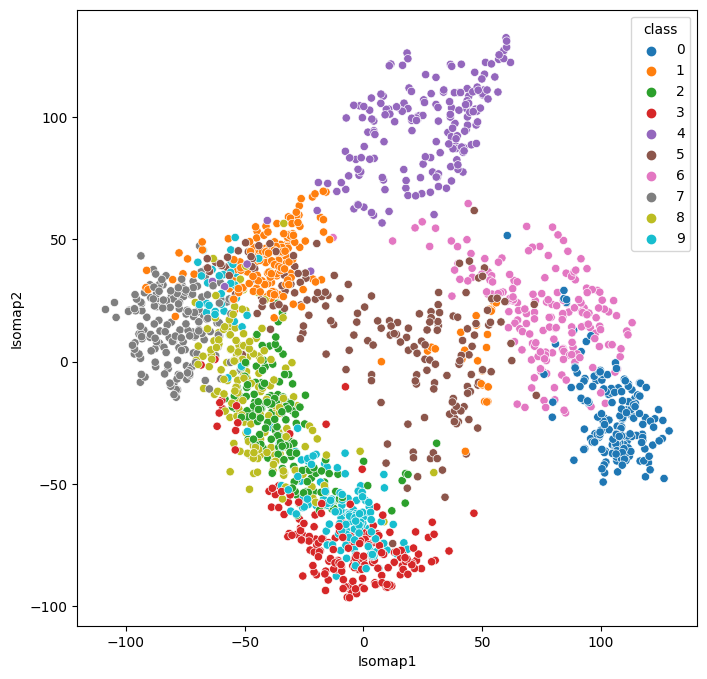

In [50]:
# 2D plot

fig=plt.figure(figsize=(8, 8))
sns.scatterplot(x='Isomap1', y='Isomap2', hue='class', data=digits_isomap_2d, palette='tab10')

In [52]:
# for 3D space
isomap_3d = Isomap(n_components=3, n_neighbors=10)

transformed = isomap_3d.fit_transform(data)

digits_isomap_3d = pd.DataFrame({'Isomap1':transformed[:, 0], 'Isomap2':transformed[:, 1], 'Isomap3':transformed[:, 2], 'class': target})

digits_isomap_3d.head()

,Isomap1,Isomap2,Isomap3,class
0,99.142117,-30.935615,73.104466,0
1,-26.787590,46.718209,-4.659440,1
2,-33.823779,3.050455,9.987567,2
3,5.898332,-70.466318,-23.771136,3
4,43.687659,111.634791,42.638981,4


In [55]:
# 3D plot
fig=plt.figure(figsize=(8, 8))
fig = px.scatter_3d(digits_isomap_3d, x='Isomap1', y='Isomap2', z='Isomap3', color='class')
fig.show()

<Figure size 800x800 with 0 Axes>

## Using Locally Linear Embedding


In [59]:
# for 2D space
lle_2d = LocallyLinearEmbedding(n_components=2, n_neighbors=15)

transformed = lle_2d.fit_transform(data, y=target)

digits_lle_2d = pd.DataFrame({'lle1':transformed[:, 0], 'lle2':transformed[:, 1], 'class': target})

digits_lle_2d.head()

,lle1,lle2,class
0,0.050600,0.037577,0
1,-0.028861,-0.004483,1
2,-0.019519,-0.010158,2
3,0.003237,0.002322,3
4,-0.018660,0.000416,4


<Axes: xlabel='lle1', ylabel='lle2'>

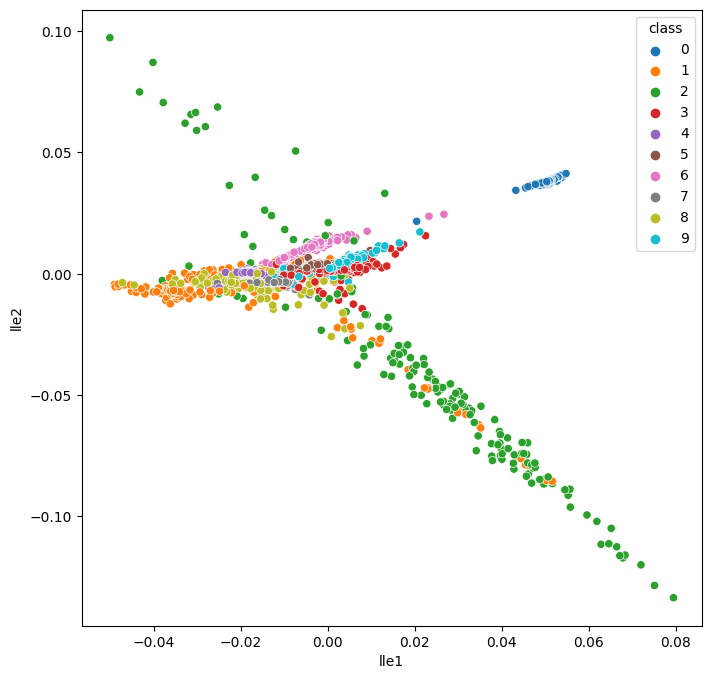

In [61]:
# 2D plot
fig=plt.figure(figsize=(8, 8))
sns.scatterplot(x='lle1', y='lle2', hue='class', data=digits_lle_2d, palette='tab10')

In [64]:
# for 3D space
lle_3d = LocallyLinearEmbedding(n_components=3, n_neighbors=15)

transformed = lle_3d.fit_transform(data, y=target)

digits_lle_3d = pd.DataFrame({'lle1':transformed[:, 0], 'lle2':transformed[:, 1], 'lle3':transformed[:, 2], 'class': target})

digits_lle_3d.head()

,lle1,lle2,lle3,class
0,0.050600,0.037604,0.004434,0
1,-0.028861,-0.004495,-0.011060,1
2,-0.019519,-0.010121,-0.002548,2
3,0.003237,0.002344,0.008292,3
4,-0.018660,0.000391,0.009162,4


In [66]:
# 3D plot
fig=plt.figure(figsize=(8, 8))
fig = px.scatter_3d(digits_lle_3d, x='lle1', y='lle2', z='lle3', color='class')
fig.show()

<Figure size 800x800 with 0 Axes>

## Using Fisher Discriminant Analysis

In [72]:
# for 2D space
lda_2d = LinearDiscriminantAnalysis(n_components=2)

transformed = lda_2d.fit_transform(data, y=target)

digits_lda_2d = pd.DataFrame({'lda1':transformed[:, 0], 'lda2':transformed[:, 1], 'class': target})

digits_lda_2d.head()

,lda1,lda2,class
0,-2.014632,-5.623486,0
1,0.220967,3.592400,1
2,2.234855,2.709504,2
3,2.760965,-0.624427,3
4,-5.845449,1.754015,4


<Axes: xlabel='lda1', ylabel='lda2'>

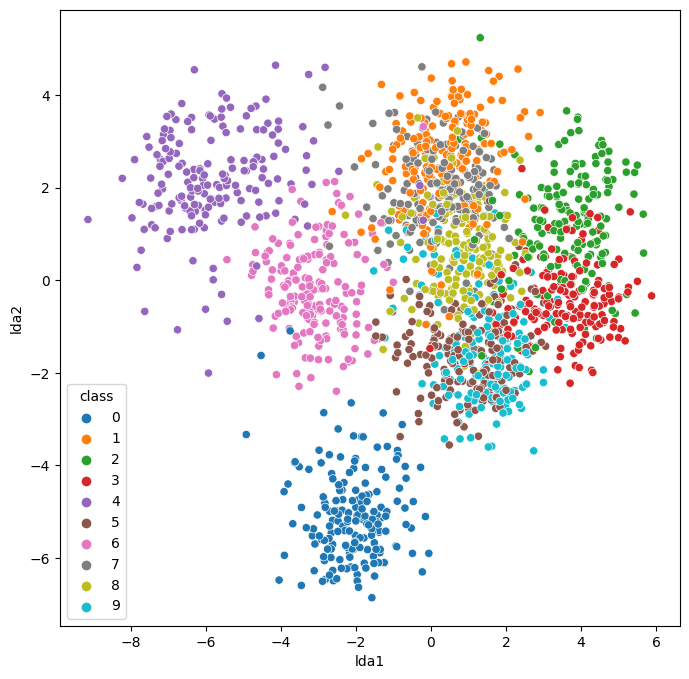

In [73]:
# 2D plot
fig=plt.figure(figsize=(8, 8))
sns.scatterplot(x='lda1', y='lda2', hue='class', data=digits_lda_2d, palette='tab10')

In [76]:
# for 3D space
lda_3d = LinearDiscriminantAnalysis(n_components=3)

transformed = lda_3d.fit_transform(data, y=target)

digits_lda_3d = pd.DataFrame({'lda1':transformed[:, 0], 'lda2':transformed[:, 1], 'lda3':transformed[:, 2], 'class': target})

digits_lda_3d.head()

,lda1,lda2,lda3,class
0,-2.014632,-5.623486,-0.186594,0
1,0.220967,3.592400,2.149017,1
2,2.234855,2.709504,4.269928,2
3,2.760965,-0.624427,0.158751,3
4,-5.845449,1.754015,0.400295,4


In [77]:
# 3D plot
fig=plt.figure(figsize=(8, 8))
fig = px.scatter_3d(digits_lda_3d, x='lda1', y='lda2', z='lda3', color='class')
fig.show()

<Figure size 800x800 with 0 Axes>